In [1]:
# Allow interactive plots
%matplotlib widget
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1' # This avoids crashes on the math cluster from using to many resources
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from analysis_library import *
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import animation
import scipy as sp

In [12]:
name_pairs = [['/HighDensitycontrolEphB2/High Density control EphB2_green frames 0 to 211_Tracks',
        '/HighDensitycontrolEphB2/High Density control EphB2_red frames 0 to 211_Tracks'],
        ['/High Density sorting EphB2/High Density sorting EphB2_green frames 0 to 211_Tracks',
        '/High Density sorting EphB2/High Density sorting ephrinB1_red 0 to 211_Tracks'],
        ['/Low Density sorting ephrinB1/Low Density sorting EphB2_green frames 11 to 211_Tracks',
        '/Low Density sorting ephrinB1/Low Density sorting ephrinB1_red frames 11 to 211_Tracks']
        ]

min_length = 0 #Tracks shorter than that are excluded

pair = name_pairs[1]
sourceFolder = '/home/marius/PhD/CellMotility/tracking_12_01_2022'#'/home/marius/PhD/CellMotility/tracking_ignacio_2022/'
outputFolder = '/home/marius/PhD/CellMotility/Plots/Plots_2023_01'
subfolder = pair[0][:pair[0].rindex("/")]

In [13]:
#Load green tracks
green_name = pair[0][:pair[0].find('f')]
green = experiment(green_name)
green.read_xml(sourceFolder+pair[0]+'.xml', min_length)



#Load red tracks
red_name = pair[1][:pair[1].find('f')]
red = experiment(red_name)
red.read_xml(sourceFolder+pair[1]+'.xml', min_length)

Read xml file in 2.570296 seconds
Read xml file in 3.629734 seconds


In [4]:
# MSD
greenMSD, greenTimes = green.MSD()
redMSD, redTimes = red.MSD()
greenTimes.shape

(200,)

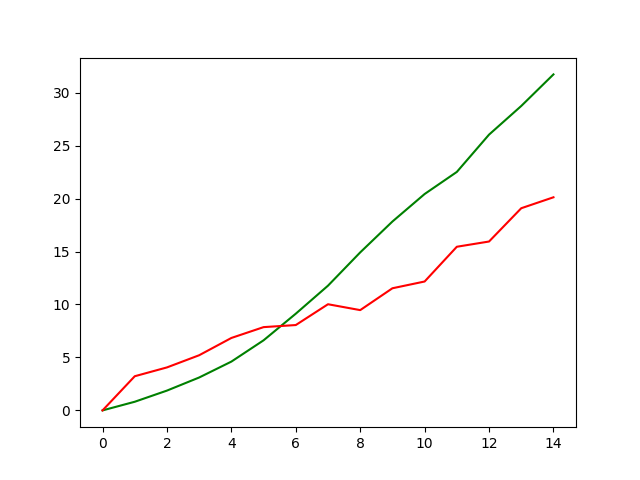

In [5]:
fig,ax = plt.subplots(1,1)
cutoff = 15
ax.plot(greenTimes[0:cutoff], greenMSD[0:cutoff],color="green")
ax.plot(redTimes[0:cutoff], redMSD[0:cutoff], color="red")

In [75]:
fig.savefig(outputFolder+pair[0]+"_MSD.pdf",dpi=500)

In [15]:
# Fit to MSD of ABPs
X = greenTimes[0:cutoff]
def f(t,A,B,C):
    return (A+B)*t+B*(np.exp(-t/C)-1)
par, parVar = sp.optimize.curve_fit(f,X, greenMSD[0:cutoff], bounds=(0,1000))
tau = par[2]
v = np.sqrt(par[1]/2/par[2]**2)
D = par[0]
print(par)
print(tau, v, D)
print(parVar)


[8.45167203e-10 2.27658249e+00 5.90126664e-01]
0.5901266641849786 1.8079293684154523 8.451672031968965e-10
[[ 1.19224328 -1.32355774 -1.04664631]
 [-1.32355774  1.47249948  1.1599191 ]
 [-1.04664631  1.1599191   2.48766814]]


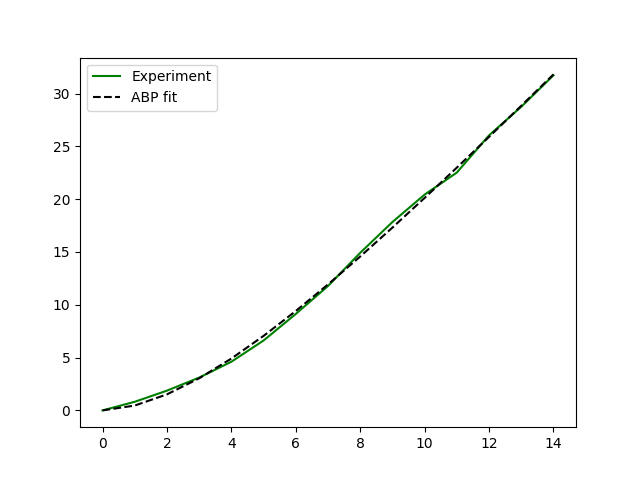

In [18]:
fig,ax = plt.subplots(1,1)
ax.plot(greenTimes[0:cutoff], greenMSD[0:cutoff],color="green", label="Experiment")
ax.plot(X,Y, linestyle="--", color="black",  label="ABP fit")
ax.legend()


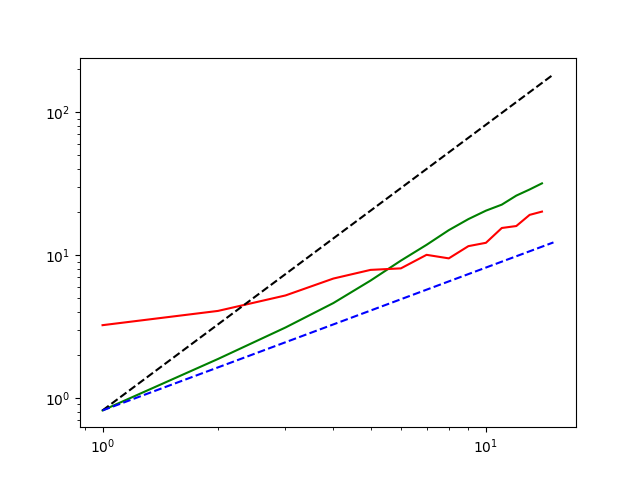

In [8]:
fig,ax = plt.subplots(1,1)
plt.loglog(greenTimes[1:cutoff], greenMSD[1:cutoff],color="green")
plt.loglog(redTimes[1:cutoff], redMSD[1:cutoff], color="red")
tmax = greenTimes[cutoff]
#Ballistic motion, starting on the left
x0 = greenMSD[1]
x1 = greenMSD[1]*(tmax)**2 
ax.loglog([greenTimes[1],greenTimes[cutoff]],[x0,x1],color='black', 
            linestyle='dashed', label='Ballistic motion')

#Normal diffusive motion, 
y0 = greenMSD[1]
y1 = greenMSD[1]*(tmax) 
ax.loglog([greenTimes[1],greenTimes[cutoff]],[y0,y1],color='blue', 
            linestyle='dashed', label='Diffusive motion')


In [79]:
fig.savefig(outputFolder+pair[0]+"_MSD_loglog.pdf",dpi=500)

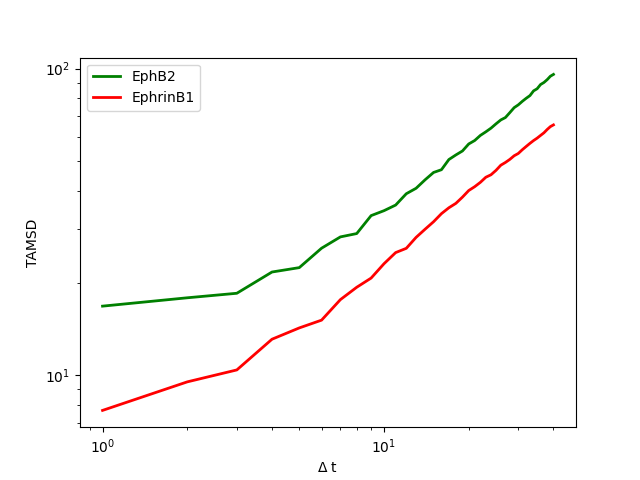

In [71]:
#TAMSD
fig,ax = plt.subplots(1,1)
tMax = 40
green.plot_TAMSD(tMax,tMax+10,ax,"EphB2","green", reference=False)
red.plot_TAMSD(tMax,tMax+10,ax,"EphrinB1","red", reference=False)
plt.legend()


In [48]:
fig.savefig(outputFolder+pair[0]+"_TAMSD.pdf",dpi=500)

Reference Histogram with 2000 particles was computed in 7.514566 seconds
Reference Histogram with 2000 particles was computed in 7.431376 seconds


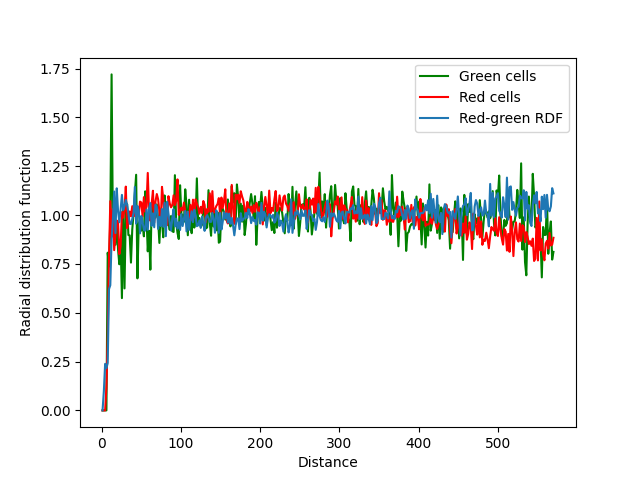

In [14]:
# RDF 
#Get final RDF
n_bins = 500
cutoff_percentage = 30
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green.tracks[0][-1][0]
#Green particles
green.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green,red], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)


In [15]:
t_final

210

Read .csv track file in 0.413410 seconds


Read .csv track file in 0.728912 seconds
Reference Histogram with 2000 particles was computed in 8.989577 seconds
Reference Histogram with 2000 particles was computed in 9.123579 seconds


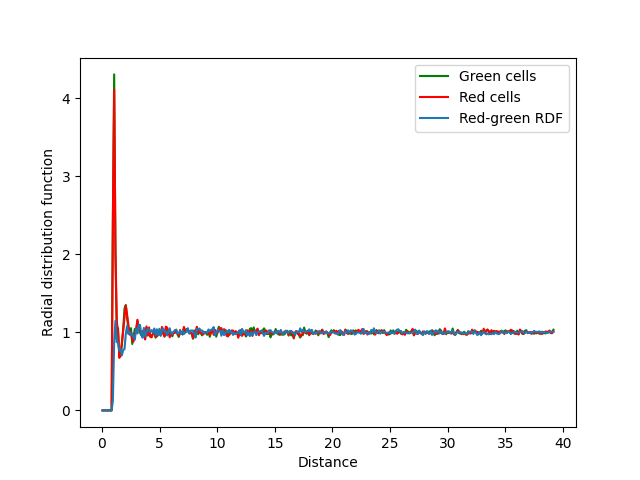

In [26]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_23_01/diffCIL_persistence/movies/A_0.5_Pe_20"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 30
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")

Read .csv track file in 0.710577 seconds
Reference Histogram with 2000 particles was computed in 9.128759 seconds
Reference Histogram with 2000 particles was computed in 9.516156 seconds


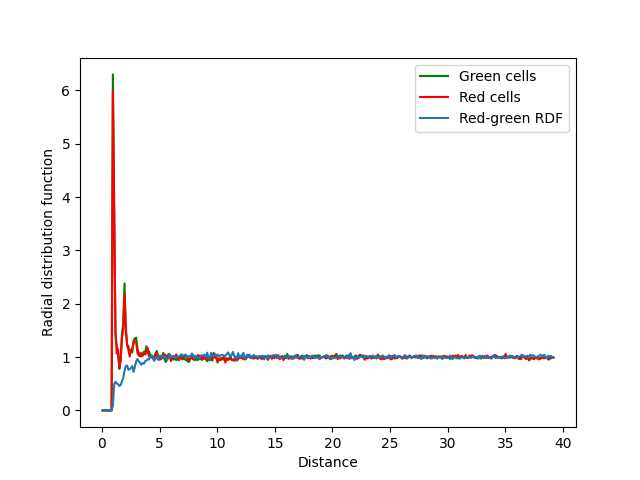

In [20]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_23_01/diffCIL_persistence/movies/A_0.5_Pe_60"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 30
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)

Read .csv track file in 1.188030 seconds
Reference Histogram with 2000 particles was computed in 9.038072 seconds
Reference Histogram with 2000 particles was computed in 9.339354 seconds


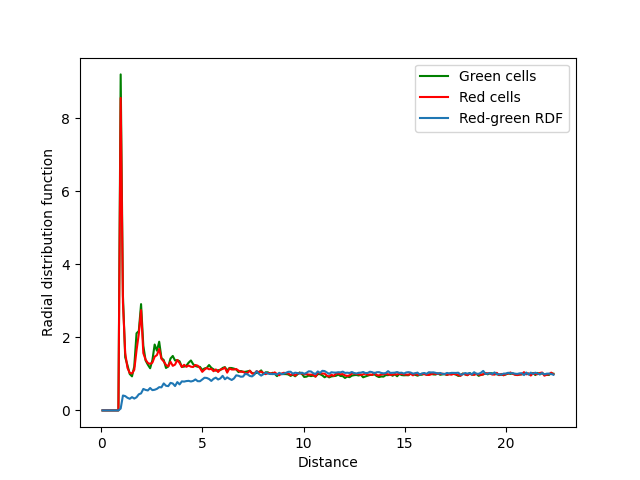

In [29]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_23_01/diffCIL_persistence/movies/A_0.5_Pe_140"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 60
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")

Read .csv track file in 0.913340 seconds
Reference Histogram with 2000 particles was computed in 9.126833 seconds
Reference Histogram with 2000 particles was computed in 9.210130 seconds


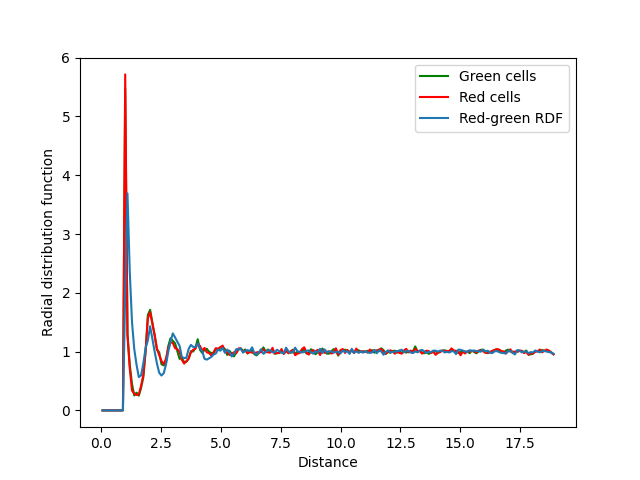

In [27]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_23_01/diffCIL_persistence/movies/A_0.7_Pe_80"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 60
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")

Read .csv track file in 0.468315 seconds
Reference Histogram with 2000 particles was computed in 9.089390 seconds
Reference Histogram with 2000 particles was computed in 9.295466 seconds


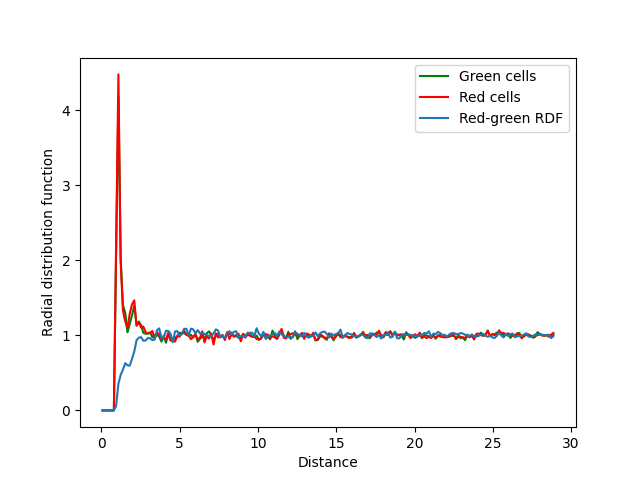

In [28]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_23_01/diffCIL_persistence/movies/A_0.3_Pe_20"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 60
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")

Read .csv track file in 1.476447 seconds
Reference Histogram with 2000 particles was computed in 8.937963 seconds
Reference Histogram with 2000 particles was computed in 9.057434 seconds


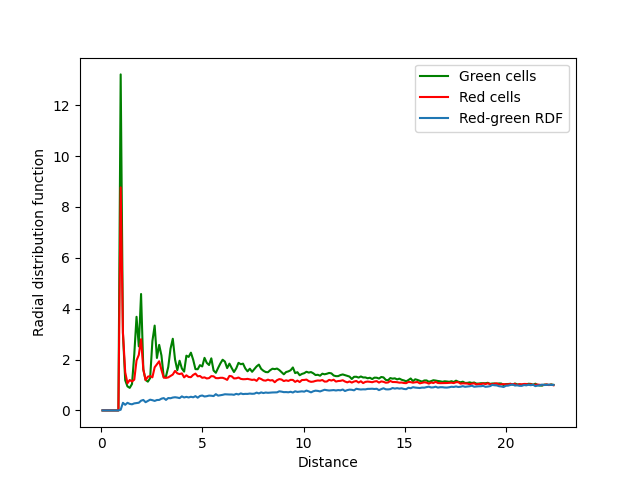

In [31]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_new_parameters/turnAround_persistence_t_100/areaFraction_0.5_Pe_120"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 60
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")


Read .csv track file in 1.182017 seconds
Reference Histogram with 2000 particles was computed in 9.101036 seconds
Reference Histogram with 2000 particles was computed in 8.957034 seconds


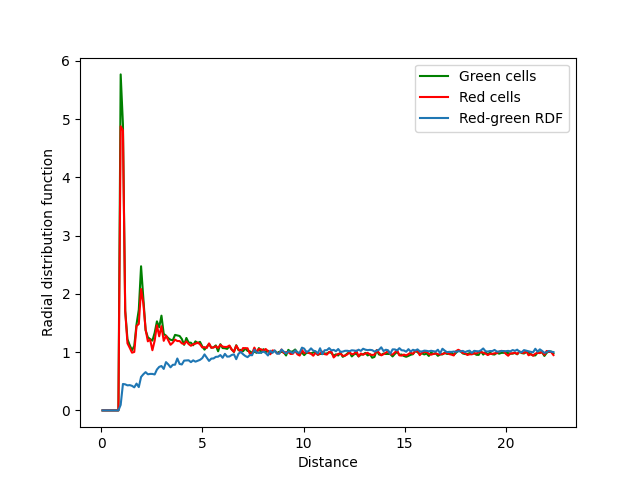

In [32]:
# Simulation data
PATH = "/home/marius/PhD/CellMotility/agent_simulation/output_new_parameters/turnAround_persistence_t_100/areaFraction_0.5_Pe_40"
green_sim, red_sim, params_sim = load_simulation_data(PATH, trackIdx="_1")
n_bins = 500
cutoff_percentage = 60
n_reference_points = 2000
fig, axes = plt.subplots(1,1)
t_final = green_sim.tracks[0][-1][0]
#Green particles
green_sim.plot_radial_density(axes, t_final , n_bins, 'Green cells','g',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
#red particles
red_sim.plot_radial_density(axes, t_final , n_bins, 'Red cells','r',cutoff_percentange = cutoff_percentage, 
                        n_reference_points = n_reference_points)
# #red-green crosscorrelation
plot_mixed_particle_radial_density(axes, [green_sim,red_sim], t_final ,n_bins, n_reference_points, 
                                    cutoff_percentage=cutoff_percentage)
fig.savefig(PATH+"_RDF.pdf")
